In [3]:
#Importing necessary toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import scipy
from scipy import stats

import statistics

from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pymc3 as pm


In [4]:
#seperator was semicolon, so 'sep' and 'engine' are necessary
df=pd.read_csv('/Users/tatendakanyere/Facebook_metrics/dataset_Facebook.csv',sep=None,engine='python')

In [5]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
df=df.rename(columns={'Total Interactions': 'Total_int'})

In [7]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total_int
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [8]:
df['Total_int'].describe() #Descriptive statisctics of the total interactions observed

count     500.000000
mean      212.120000
std       380.233118
min         0.000000
25%        71.000000
50%       123.500000
75%       228.500000
max      6334.000000
Name: Total_int, dtype: float64

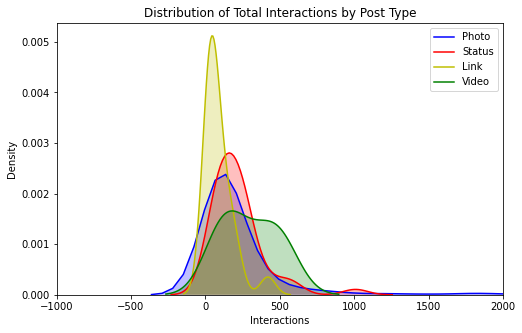

In [9]:
#Plot by Post Type
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[(df['Type']=='Photo'),'Total_int'],color='b',label='Photo',shade=
            True)
sns.kdeplot(df.loc[(df['Type']=='Status'),'Total_int'],color='r',label='Status',shade=
            True)
sns.kdeplot(df.loc[(df['Type']=='Link'),'Total_int'],color='y',label='Link',shade=
            True)
sns.kdeplot(df.loc[(df['Type']=='Video'),'Total_int'],color='g',label='Video',shade=
            True)
plt.xlim(-1000,2000)
plt.xlabel('Interactions')
plt.ylabel('Density')
plt.title('Distribution of Total Interactions by Post Type')
plt.show()

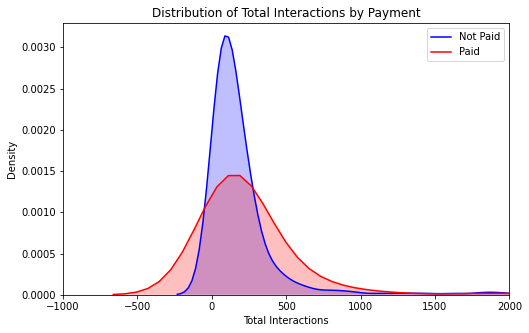

In [10]:
#Distribution of Total Interactions By Payment
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[(df['Paid']==0.0),'Total_int'],color='b',label='Not Paid',shade=
            True)
sns.kdeplot(df.loc[(df['Paid']==1.0),'Total_int'],color='r',label='Paid',shade=
            True)
plt.xlim(-1000,2000) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Total Interactions')
plt.ylabel('Density')
plt.title('Distribution of Total Interactions by Payment')
plt.show()

In [11]:
#Produce a list of variables and how they correlate to the total interaction of a post
df.corr()['Total_int'].sort_values()

Post Weekday                                                          -0.081049
Post Hour                                                             -0.027421
Post Month                                                             0.018362
Page total likes                                                       0.045231
Paid                                                                   0.107739
Category                                                               0.127307
Lifetime Post Consumptions                                             0.238082
Lifetime Post Impressions by people who have liked your Page           0.250083
Lifetime Post Total Impressions                                        0.343358
Lifetime Post Consumers                                                0.354502
Lifetime People who have liked your Page and engaged with your post    0.492570
Lifetime Post Total Reach                                              0.538597
Lifetime Engaged Users                  

Pearson's correlation coefficient scores between -1 and 1 (-1= perfectly negatively correlated, 0= no correlation, 1= perfectly positively correlated).
Here we can see that when it comes to total interactions, it does not correlate with whether or not payment is provided(The score is 0.107739). We can see that having more people liking a given page(0.617929), as well as having more engaged users in general(0.572159), positively correlate with having higher total post interaction.

In [12]:
cat_df=df.select_dtypes(object)
dummy_df=pd.get_dummies(cat_df)
dummy_df['Total_int']=df['Total_int']
dummy_df.corr()['Total_int'].sort_values()

Type_Link     -0.069511
Type_Status    0.004077
Type_Video     0.026268
Type_Photo     0.028170
Total_int      1.000000
Name: Total_int, dtype: float64

The categorial variables were too low to consider for the feature selection.

In [13]:
def format_data(df):
    # Target is total interaction on posts
    labels = df['Total_int']
    
    # Drop the likes, comments and shares
    df = df.drop(columns=['like', 'comment', 'share'])
    
    # One-Hot Encoding of Categorical Variables (Allowing them to be feauture selected as they are not numerical)
    df = pd.get_dummies(df)
    
    # Find correlations with the interactions
    most_correlated = df.corr().abs()['Total_int'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with interactions
    most_correlated = most_correlated[:8]
    
    df = df.loc[:, most_correlated.index]
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test
format_data(df)

(     Total_int  Lifetime Post reach by people who like your Page  \
 227        126                                             22016   
 417          0                                              1062   
 203        243                                             30912   
 126        242                                              1674   
 329        180                                              2644   
 ..         ...                                               ...   
 106        222                                              1890   
 270        730                                             17104   
 348        190                                              2752   
 435        110                                              6616   
 102         79                                              1118   
 
      Lifetime Engaged Users  Lifetime Post Total Reach  \
 227                     699                      95424   
 417                      25                       1

In [14]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,Total_int,Lifetime Post reach by people who like your Page,Lifetime Engaged Users,Lifetime Post Total Reach,Lifetime People who have liked your Page and engaged with your post,Lifetime Post Consumers,Lifetime Post Total Impressions,Lifetime Post Impressions by people who have liked your Page
227,126,22016,699,95424,417,575,252207,78287
417,0,1062,25,1874,15,25,2474,1483
203,243,30912,946,72864,646,759,205934,122474
126,242,1674,474,3366,385,345,6647,3180
329,180,2644,684,4032,432,607,7278,4935


In [15]:
 # Rename variables in train and test. Refer to this if the below plot confuses you
X_train = X_train.rename(columns={'Lifetime Post reach by people who like your Page': 'LifeReach_Like', 
                                  'Lifetime Engaged Users': 'LifeEngage_Users',
                                  'Lifetime Post Total Reach': 'LifePost_TReach',
                                 'Lifetime People who have liked your Page and engaged with your post': 'LifeLike_Page_EngagePost',
                                 'Lifetime Post Consumers':'LifePost_Cons',
                                 'Lifetime Post Total Impressions':'LifePost_Total_Impressions',
                                 'Lifetime Post Impressions by people who have liked your Page': 'LPTI_LikePage'})

X_test = X_test.rename(columns={'Lifetime Post reach by people who like your Page': 'LifeReach_Like', 
                                  'Lifetime Engaged Users': 'LifeEngage_Users',
                                  'Lifetime Post Total Reach': 'LifePost_TReach',
                                 'Lifetime People who have liked your Page and engaged with your post': 'LifeLike_Page_EngagePost',
                                 'Lifetime Post Consumers':'LifePost_Cons',
                                 'Lifetime Post Total Impressions':'LifePost_Total_Impressions',
                                 'Lifetime Post Impressions by people who have liked your Page': 'LPTI_LikePage'})

In [16]:
#Ensuring the size of training and test data
print(X_train.shape)
print(X_test.shape)

(375, 8)
(125, 8)


<Figure size 864x864 with 0 Axes>

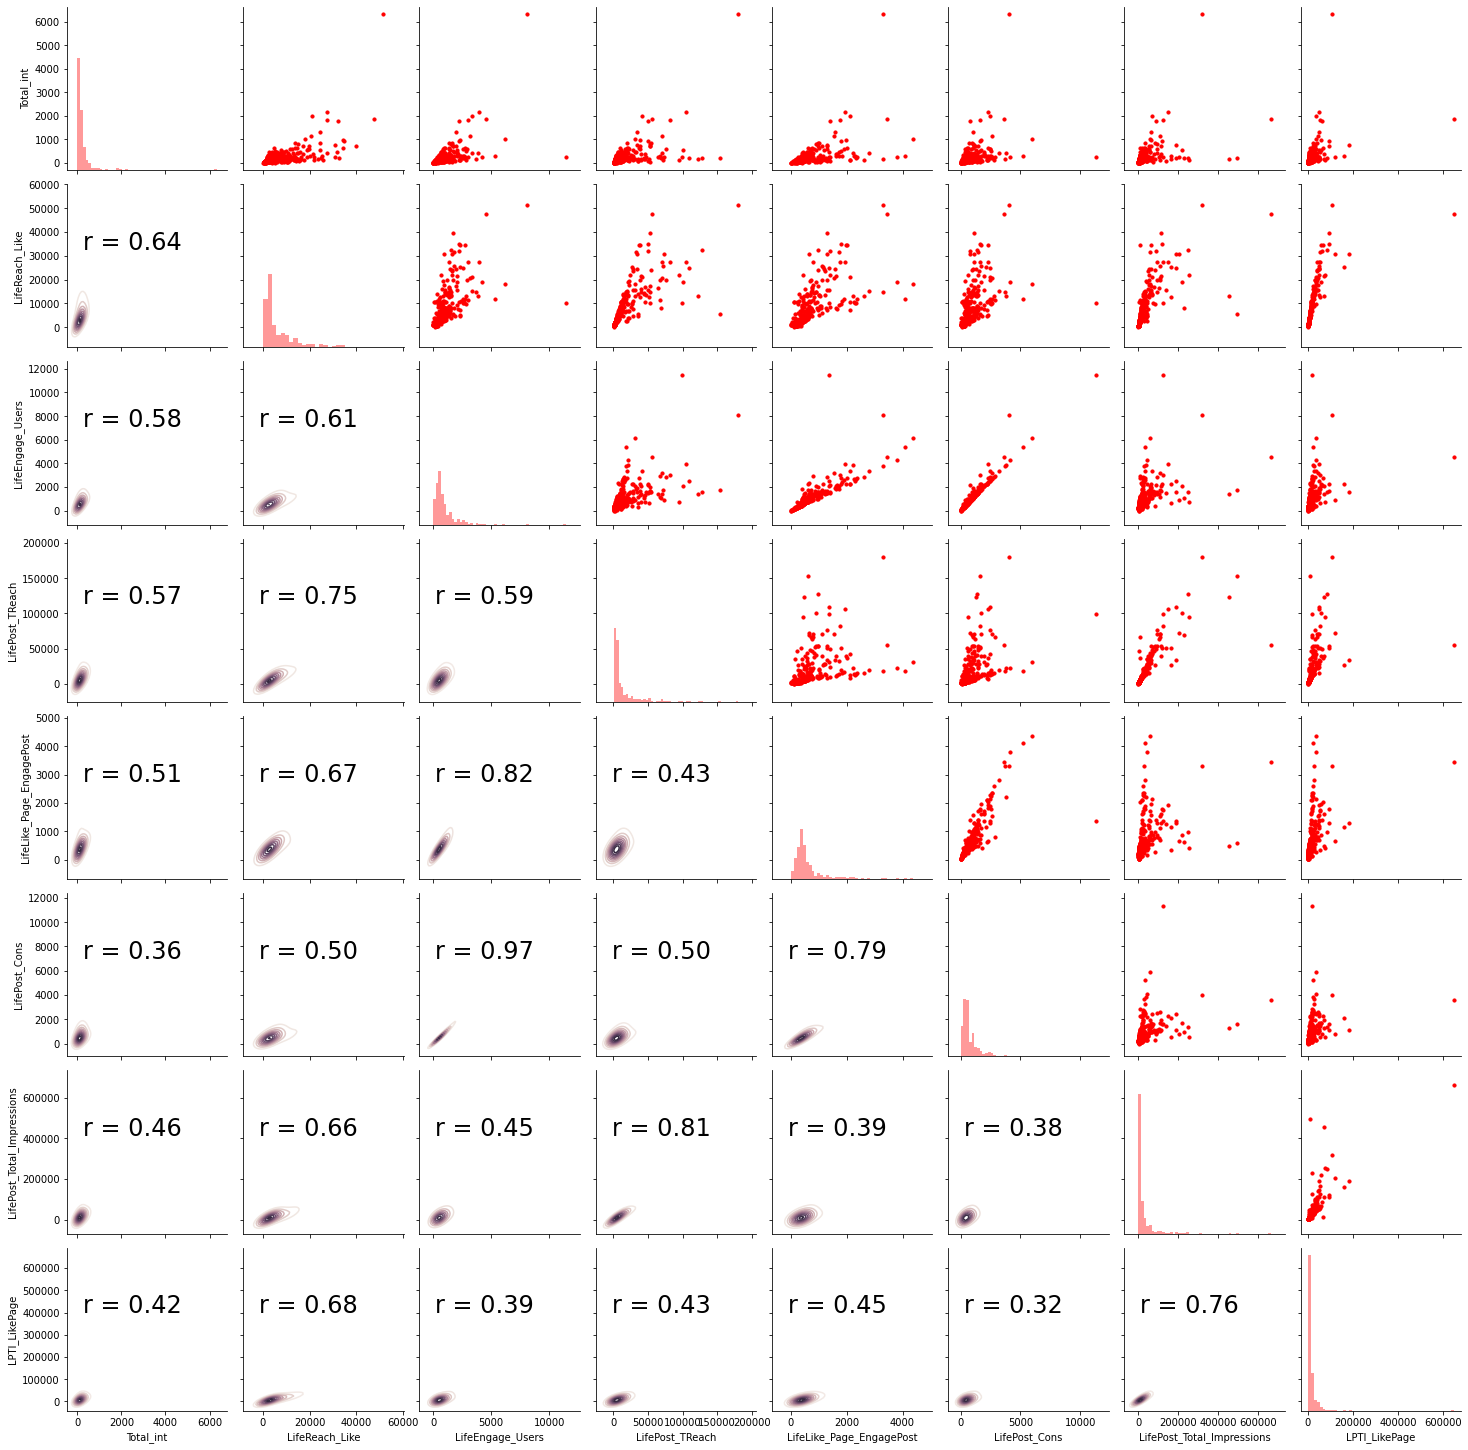

In [17]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)
plt.figure(figsize=(12,12))
# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

The graph about shows multiple plots highlighting pearson's correlation coefficient (-1 to 1), with a plot of each variable against every other.

In [18]:
# Calculate mean absolute error and root mean squared error
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [19]:
# Naive baseline is the median (Model should at least outperform median baseline, or cause for concern)
median_pred = X_train['Total_int'].median()
median_preds = [median_pred for i in range(len(X_test))]
true = X_test['Total_int']

In [20]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 107.6320
Median Baseline RMSE: 235.4465


In [21]:
def compare(X_train, X_test, y_train, y_test):
    # Models to test
    model_name = ['Linear Regression','Random Forest',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Total_int')
    X_test = X_test.drop(columns='Total_int')
    
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=50)
    model3 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name)
    
    # Train and test models for comparison
    for i, model in enumerate([model1, model2, model3]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model = model_name[i]
        results.loc[model, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [22]:
results = compare(X_train, X_test, y_train, y_test)

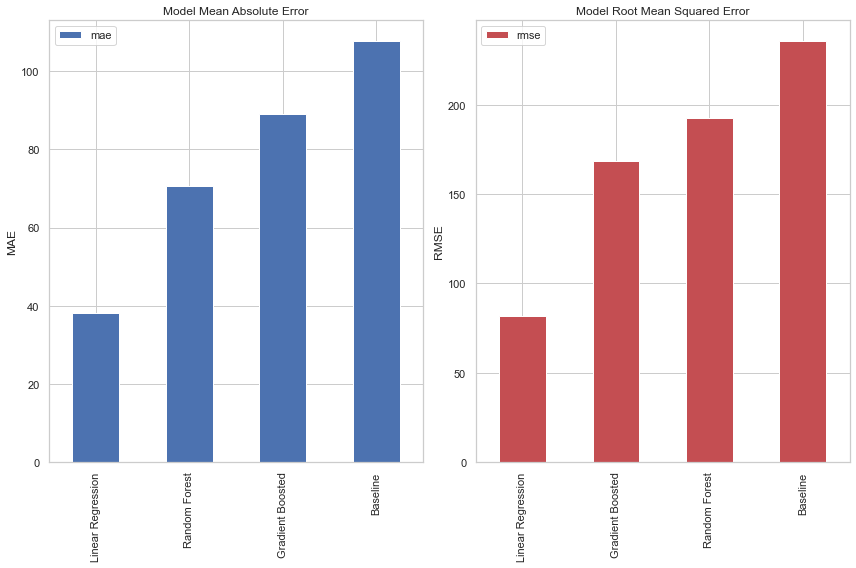

In [102]:
plt.figure(figsize=(12,8))
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [103]:
results

,mae,rmse
Linear Regression,38.1667,81.6427
Random Forest,70.6962,192.813
Gradient Boosted,89.0123,168.285
Baseline,107.632,235.446


In [104]:
print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Gradient Boosted regressor is 17.30% better than the baseline.


RMSE provides an average error in the model, larger anomalies may be over-weighed, so it is best used when large errors are particularly avoided. 

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. Measures absolute difference at every data point without changing weight.

As Linear Regression has a lower rmse and mae than the rest of the models, it proves to be the best model according to these two parameters.

In [127]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Total_int ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'G3 ~ LifeReach_Like + LifeEngage_Users + LifePost_TReach + LifeLike_Page_EngagePost + LifePost_Cons + LifePost_Total_Impressions + LPTI_LikePage'

In [128]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    n_trace = pm.sample(draws=2000, chains = 2, tune = 500, target_accept=0.9)

PatsyError: Error evaluating factor: NameError: name 'G3' is not defined
    G3 ~ LifeReach_Like + LifeEngage_Users + LifePost_TReach + LifeLike_Page_EngagePost + LifePost_Cons + LifePost_Total_Impressions + LPTI_LikePage
    ^^